## 1.Data Preprocessing and EDA Liberaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

# 2.Importing the customer Churn data to colab link text 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
pd.set_option('display.max_columns', None)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/Data Mining - Project Dataset/telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/Data Mining/Data Mining - Project Dataset/telecom_customer_churn.csv')

## 3. Data Exploration

In [ ]:
df.shape # shape of the df

(7043, 38)

In [ ]:
df.dtypes.value_counts() #count in each category

object     23
float64     9
int64       6
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [ ]:
df_table = pd.DataFrame({'Dtype': df.dtypes,"Unique" : df.nunique(),"Missing Value": df.isnull().sum(),
    '% missing': (df.isna().sum()/len(df)*100).round(2),'Duplicated' : df.duplicated().sum()})
df_table  #data overview of each variable

,Dtype,Unique,Missing Value,% missing,Duplicated
Customer ID,object,7043,0,0.00,0
Gender,object,2,0,0.00,0
Age,int64,62,0,0.00,0
Married,object,2,0,0.00,0
Number of Dependents,int64,10,0,0.00,0
City,object,1106,0,0.00,0
Zip Code,int64,1626,0,0.00,0
Latitude,float64,1626,0,0.00,0
Longitude,float64,1625,0,0.00,0
Number of Referrals,int64,12,0,0.00,0


In [ ]:
df.describe().round()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,6361.0,5517.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0
mean,47.0,0.0,93486.0,36.0,-120.0,2.0,32.0,25.0,26.0,64.0,2280.0,2.0,7.0,749.0,3034.0
std,17.0,1.0,1857.0,2.0,2.0,3.0,25.0,14.0,20.0,31.0,2266.0,8.0,25.0,847.0,2865.0
min,19.0,0.0,90001.0,33.0,-124.0,0.0,1.0,1.0,2.0,-10.0,19.0,0.0,0.0,0.0,21.0
25%,32.0,0.0,92101.0,34.0,-122.0,0.0,9.0,13.0,13.0,30.0,400.0,0.0,0.0,71.0,606.0
50%,46.0,0.0,93518.0,36.0,-120.0,0.0,29.0,26.0,21.0,70.0,1395.0,0.0,0.0,401.0,2109.0
75%,60.0,0.0,95329.0,38.0,-118.0,3.0,55.0,38.0,30.0,90.0,3787.0,0.0,0.0,1191.0,4801.0
max,80.0,9.0,96150.0,42.0,-114.0,11.0,72.0,50.0,85.0,119.0,8685.0,50.0,150.0,3565.0,11979.0


## 4.Cleaning & Handling Missing Values

In [ ]:
df = df.drop(['Churn Category','Churn Reason','Customer ID'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              7043 non-null   object 
 11  Phone Service                      7043 non-null   objec

In [ ]:
df_num = df.select_dtypes('number')
df_object = df.select_dtypes('object')

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Number of Dependents               7043 non-null   int64  
 2   Zip Code                           7043 non-null   int64  
 3   Latitude                           7043 non-null   float64
 4   Longitude                          7043 non-null   float64
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Avg Monthly Long Distance Charges  6361 non-null   float64
 8   Avg Monthly GB Download            5517 non-null   float64
 9   Monthly Charge                     7043 non-null   float64
 10  Total Charges                      7043 non-null   float64
 11  Total Refunds                      7043 non-null   float

In [ ]:
df_num.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3575822700>,
      dtype=object)

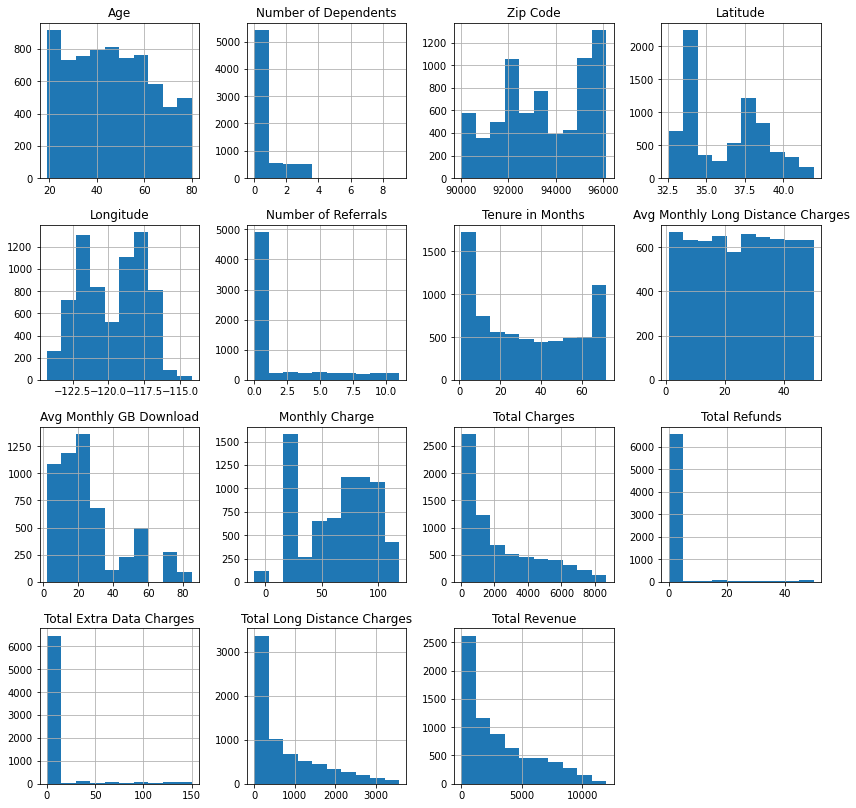

In [ ]:
df_num.hist(figsize=(14,14))

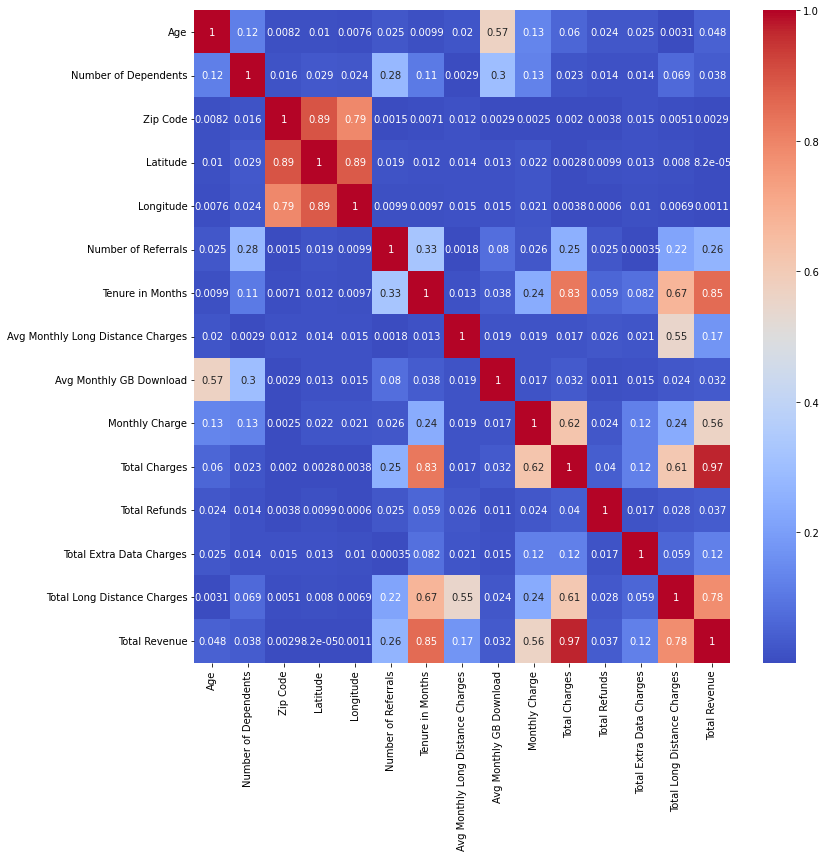

In [ ]:
cor = df_num.corr().abs()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, ax = ax, cmap='coolwarm');

In [ ]:
df_num = df_num.drop(['Total Charges','Total Long Distance Charges','Longitude','Latitude', 'Zip Code'],axis=1)

KeyError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f356508a070>,
      dtype=object)

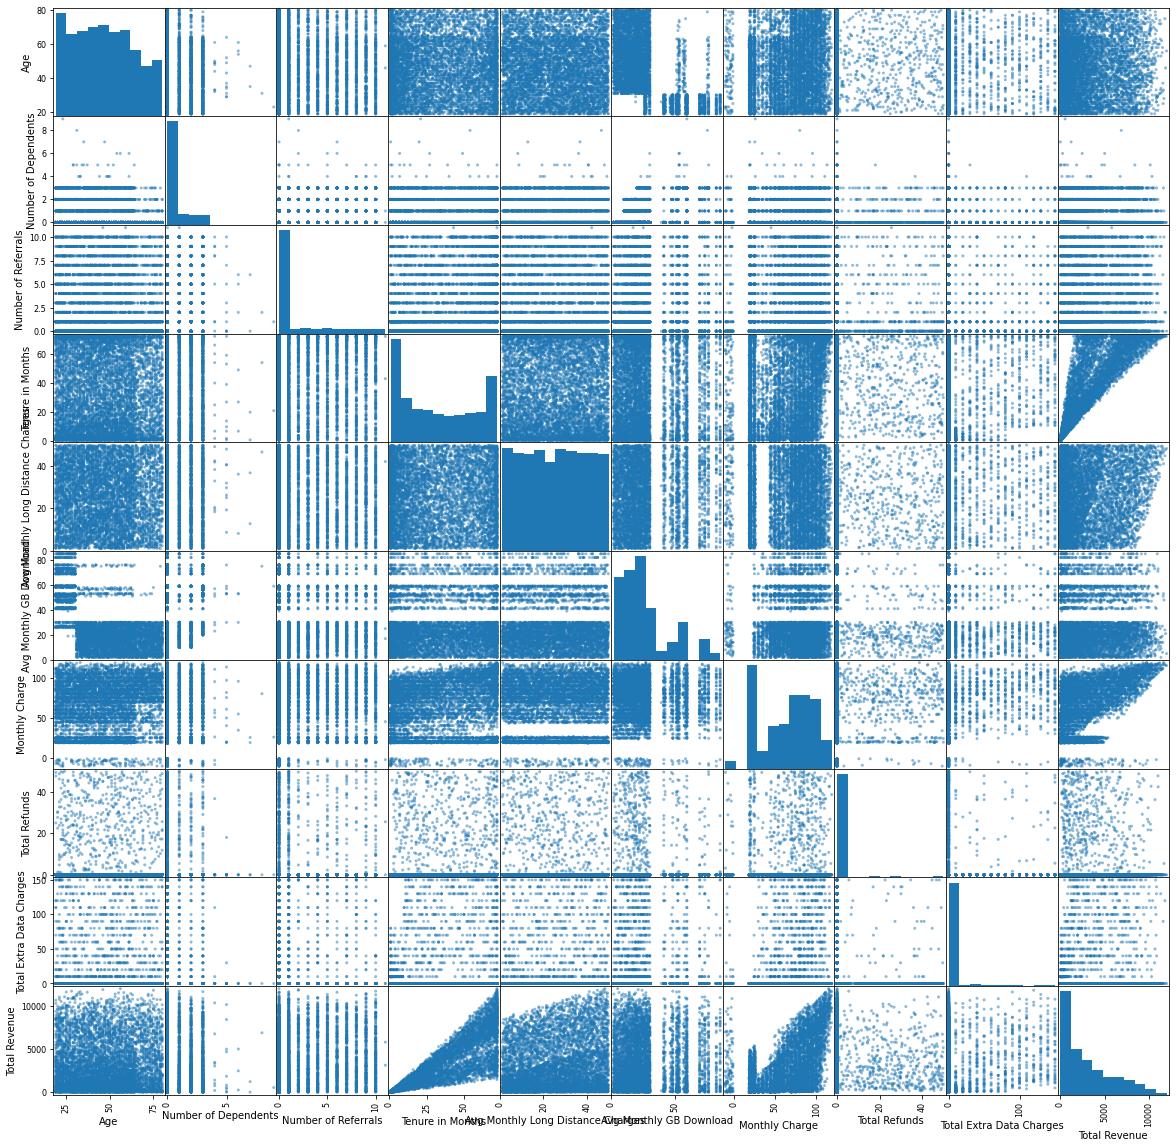

In [ ]:
pd.plotting.scatter_matrix(df_num, figsize=(20,20))

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T 

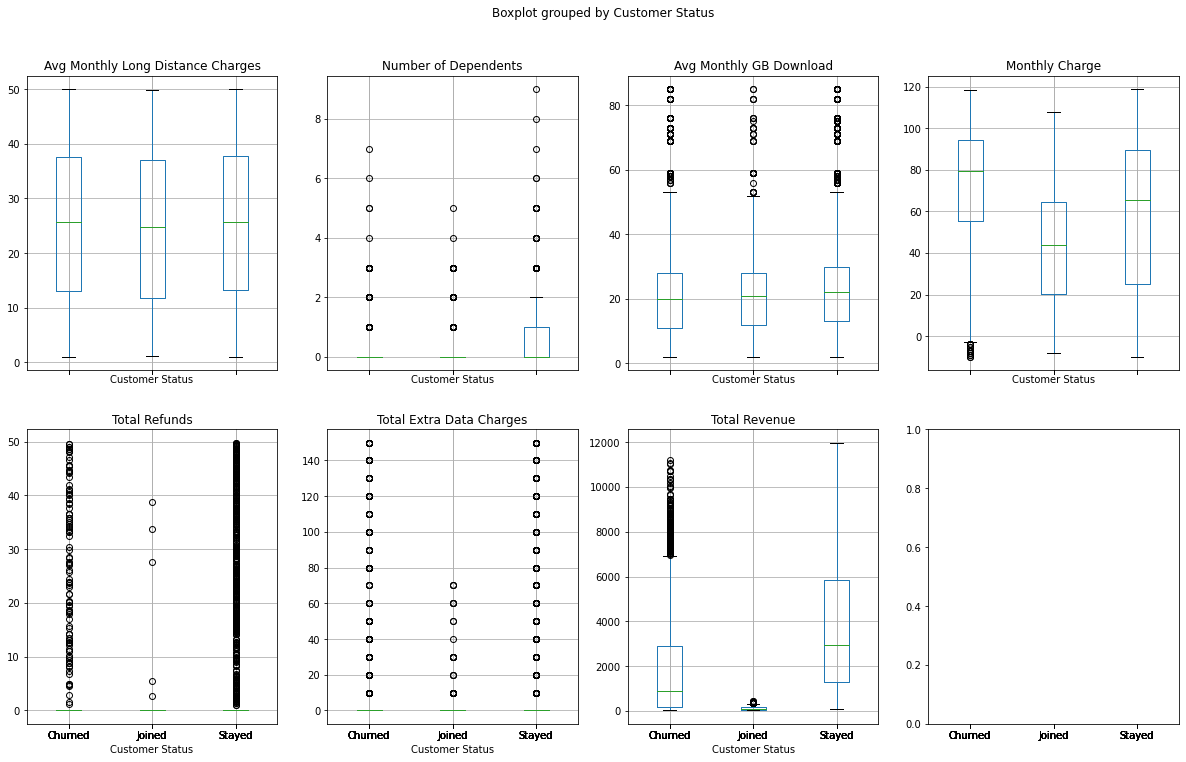

In [ ]:
fig, axes = plt.subplots(2,4,sharex=True,sharey=False,figsize=(20,12))
df_num.join(df['Customer Status']).boxplot(['Avg Monthly Long Distance Charges','Number of Dependents','Avg Monthly GB Download',
                                            'Monthly Charge','Total Refunds','Total Extra Data Charges','Total Revenue'],
                                           'Customer Status',ax=axes.flatten()[:-1]);

In [ ]:
df_object = df_object.drop(['City'],axis=1)


In [ ]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  7043 non-null   object
 1   Married                 7043 non-null   object
 2   Offer                   7043 non-null   object
 3   Phone Service           7043 non-null   object
 4   Multiple Lines          6361 non-null   object
 5   Internet Service        7043 non-null   object
 6   Internet Type           5517 non-null   object
 7   Online Security         5517 non-null   object
 8   Online Backup           5517 non-null   object
 9   Device Protection Plan  5517 non-null   object
 10  Premium Tech Support    5517 non-null   object
 11  Streaming TV            5517 non-null   object
 12  Streaming Movies        5517 non-null   object
 13  Streaming Music         5517 non-null   object
 14  Unlimited Data          5517 non-null   object
 15  Cont

In [ ]:
df_object['Multiple Lines'] = df_object['Multiple Lines'].replace(np.nan,'NO phone Service')
df_num['Avg Monthly Long Distance Charges'] = df_num['Avg Monthly Long Distance Charges'].replace(np.nan,'NO phone Service')

In [ ]:
df_object[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']] = df_object[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']].replace(np.nan,'No Internet')
df_num['Avg Monthly GB Download'] = df_num['Avg Monthly GB Download'].replace(np.nan,0.0)

In [ ]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  7043 non-null   object
 1   Married                 7043 non-null   object
 2   Offer                   7043 non-null   object
 3   Phone Service           7043 non-null   object
 4   Multiple Lines          7043 non-null   object
 5   Internet Service        7043 non-null   object
 6   Internet Type           7043 non-null   object
 7   Online Security         7043 non-null   object
 8   Online Backup           7043 non-null   object
 9   Device Protection Plan  7043 non-null   object
 10  Premium Tech Support    7043 non-null   object
 11  Streaming TV            7043 non-null   object
 12  Streaming Movies        7043 non-null   object
 13  Streaming Music         7043 non-null   object
 14  Unlimited Data          7043 non-null   object
 15  Cont

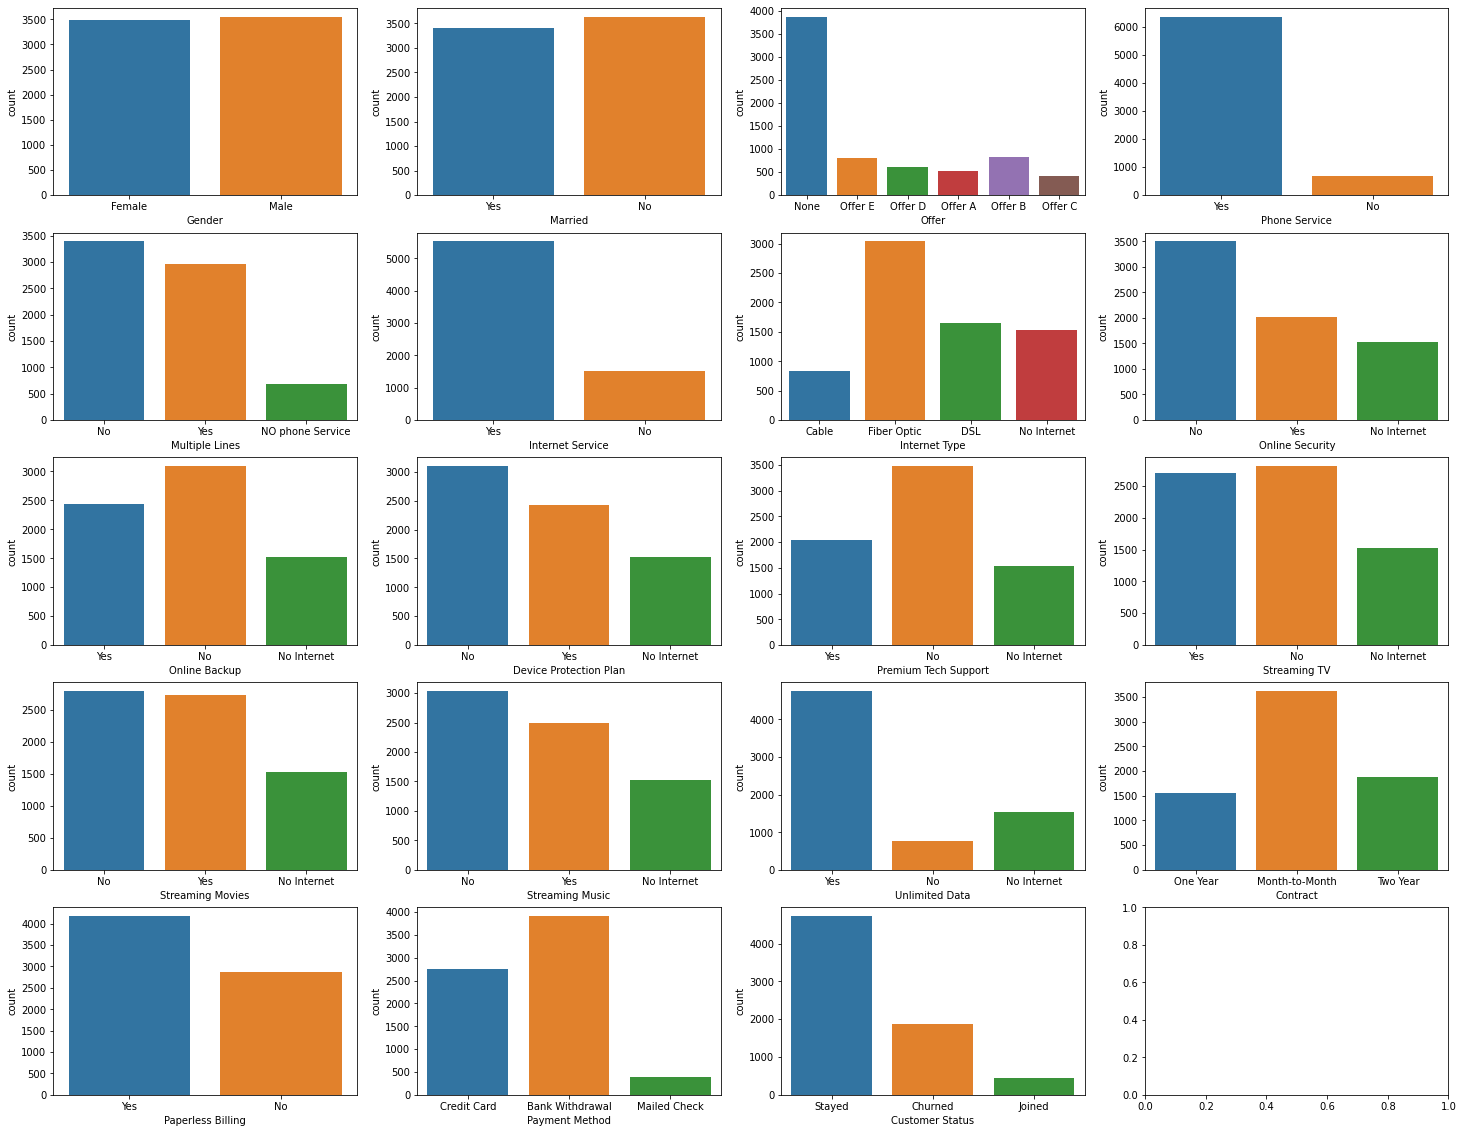

In [ ]:
fig, axes = plt.subplots(5,4,figsize=(25,20))
for i,col in enumerate(df_object.columns):
    sns.countplot(data=df_object,x=col,ax=axes.flat[i])

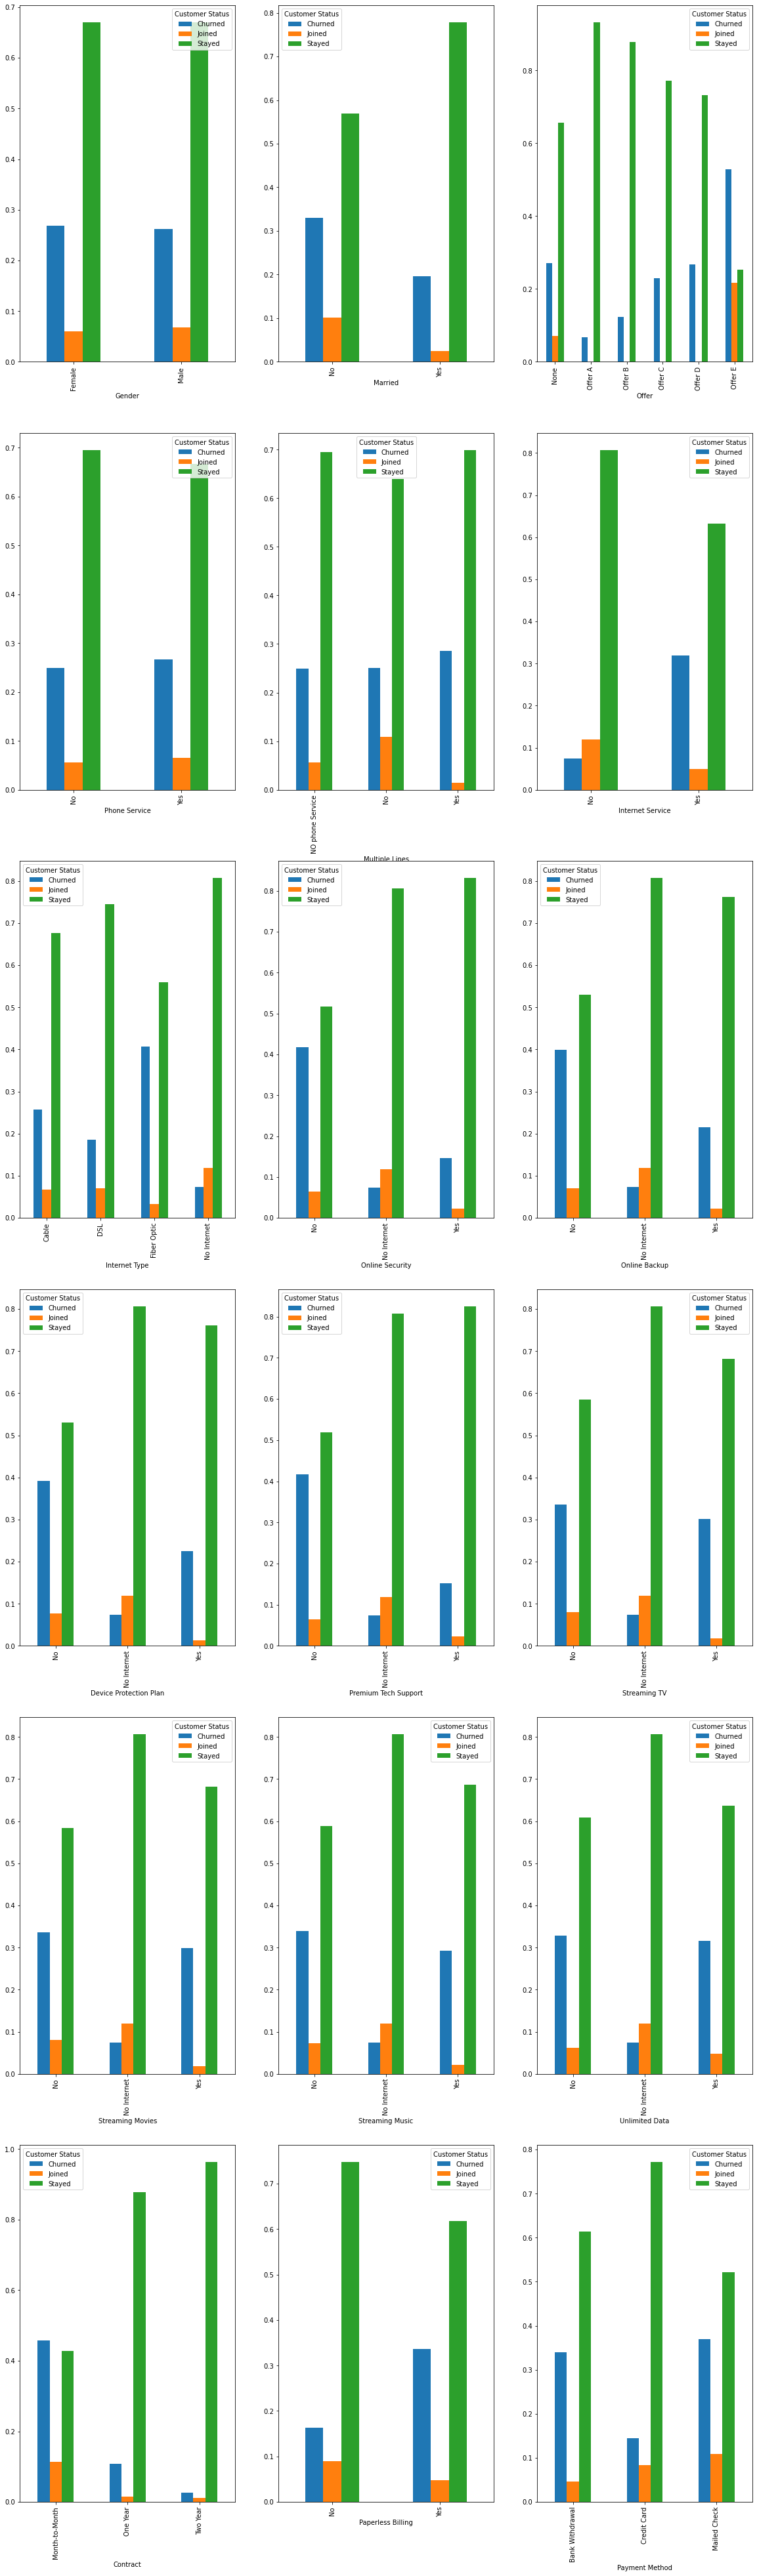

In [ ]:
i=0
fig,axes=plt.subplots(6,3,figsize=(20,70))
for col in df_object.columns:
    if col != 'Customer Status':
        pd.crosstab(df_object[col],df_object['Customer Status'],normalize='index').plot(kind='bar',ax=axes.flat[i])
        i+=1

In [ ]:
df.drop(columns = ['Zip Code', 'Latitude', 'Longitude', 'City'],axis =1, inplace = True)

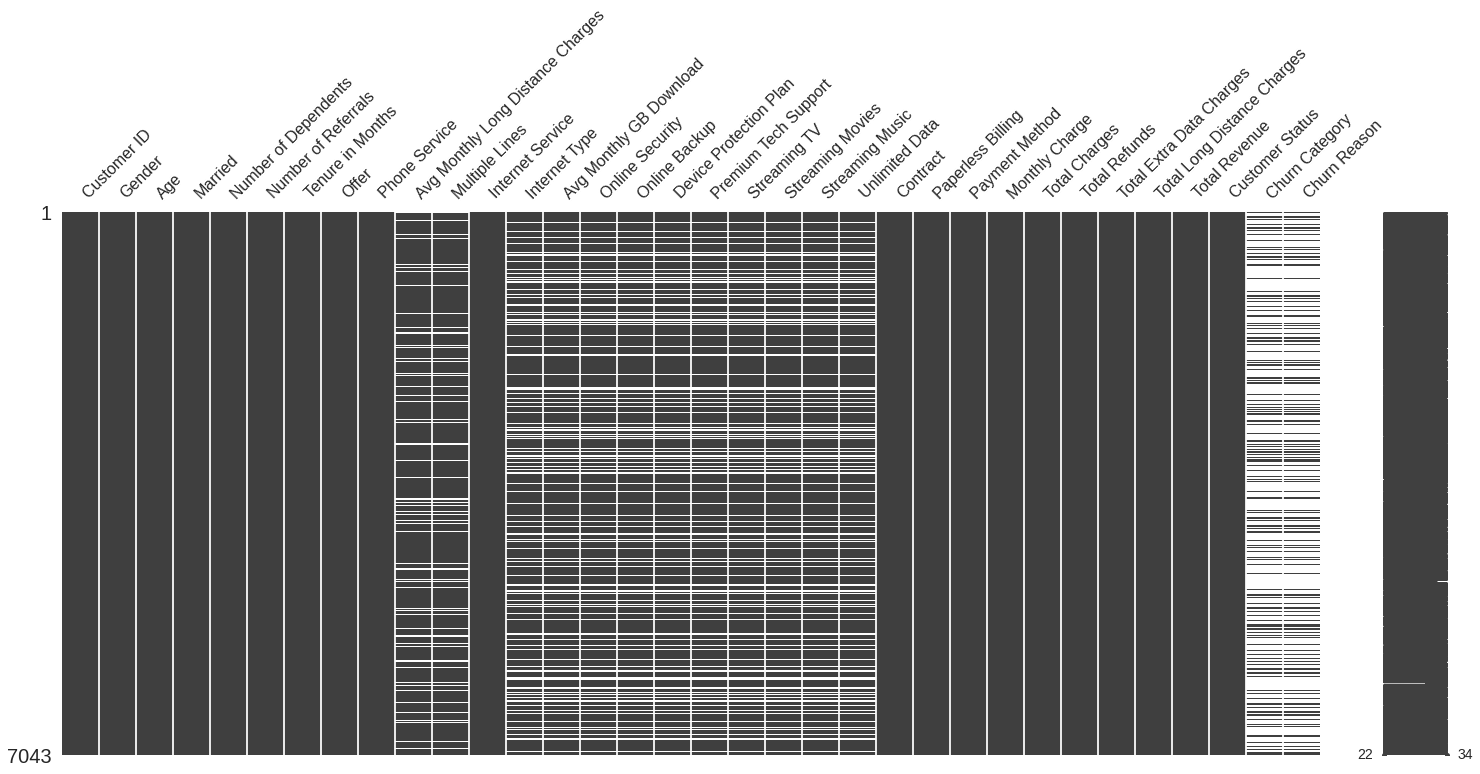

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [ ]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df['Avg Monthly GB Download'] = knn_imputer.fit_transform(df[['Avg Monthly GB Download']])
df['Avg Monthly Long Distance Charges'] = knn_imputer.fit_transform(df[['Avg Monthly Long Distance Charges']])

In [ ]:
from sklearn.impute import SimpleImputer

#setting strategy 'most_freq' to impute by the mode
const_imputer = SimpleImputer(strategy='most_frequent') 
df['Churn Reason'] = const_imputer.fit_transform(df[['Churn Reason']])
df['Churn Category'] = const_imputer.fit_transform(df[['Churn Category']])
df['Unlimited Data'] = const_imputer.fit_transform(df[['Unlimited Data']])
df['Streaming Music'] = const_imputer.fit_transform(df[['Streaming Music']])
df['Streaming Movies'] = const_imputer.fit_transform(df[['Streaming Movies']])
df['Streaming TV'] = const_imputer.fit_transform(df[['Streaming TV']])
df['Premium Tech Support'] = const_imputer.fit_transform(df[['Premium Tech Support']])
df['Device Protection Plan'] = const_imputer.fit_transform(df[['Device Protection Plan']])
df['Online Backup'] = const_imputer.fit_transform(df[['Online Backup']])
df['Online Security'] = const_imputer.fit_transform(df[['Online Security']])
df['Internet Type'] = const_imputer.fit_transform(df[['Internet Type']])
df['Multiple Lines'] = const_imputer.fit_transform(df[['Multiple Lines']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [ ]:
df.drop(columns=['Customer ID'], axis = 1, inplace = True)

# 5.Graphs

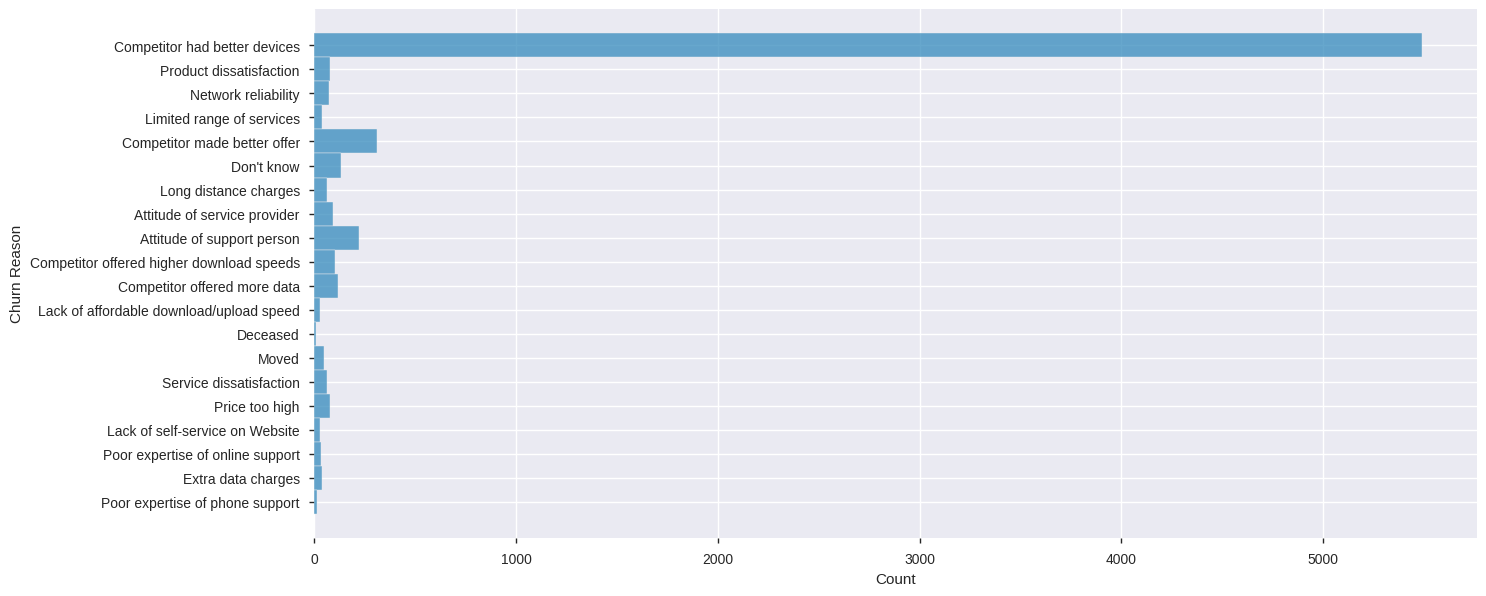

In [ ]:
# create figure and axes
fig, ax = plt.subplots(figsize=(15, 7), dpi=100)
# ax.tick_params(axis='y', rotation=45)
# plot to the existing fig, by using ax=ax
p = sns.histplot(data=df, y='Churn Reason', ax=ax)

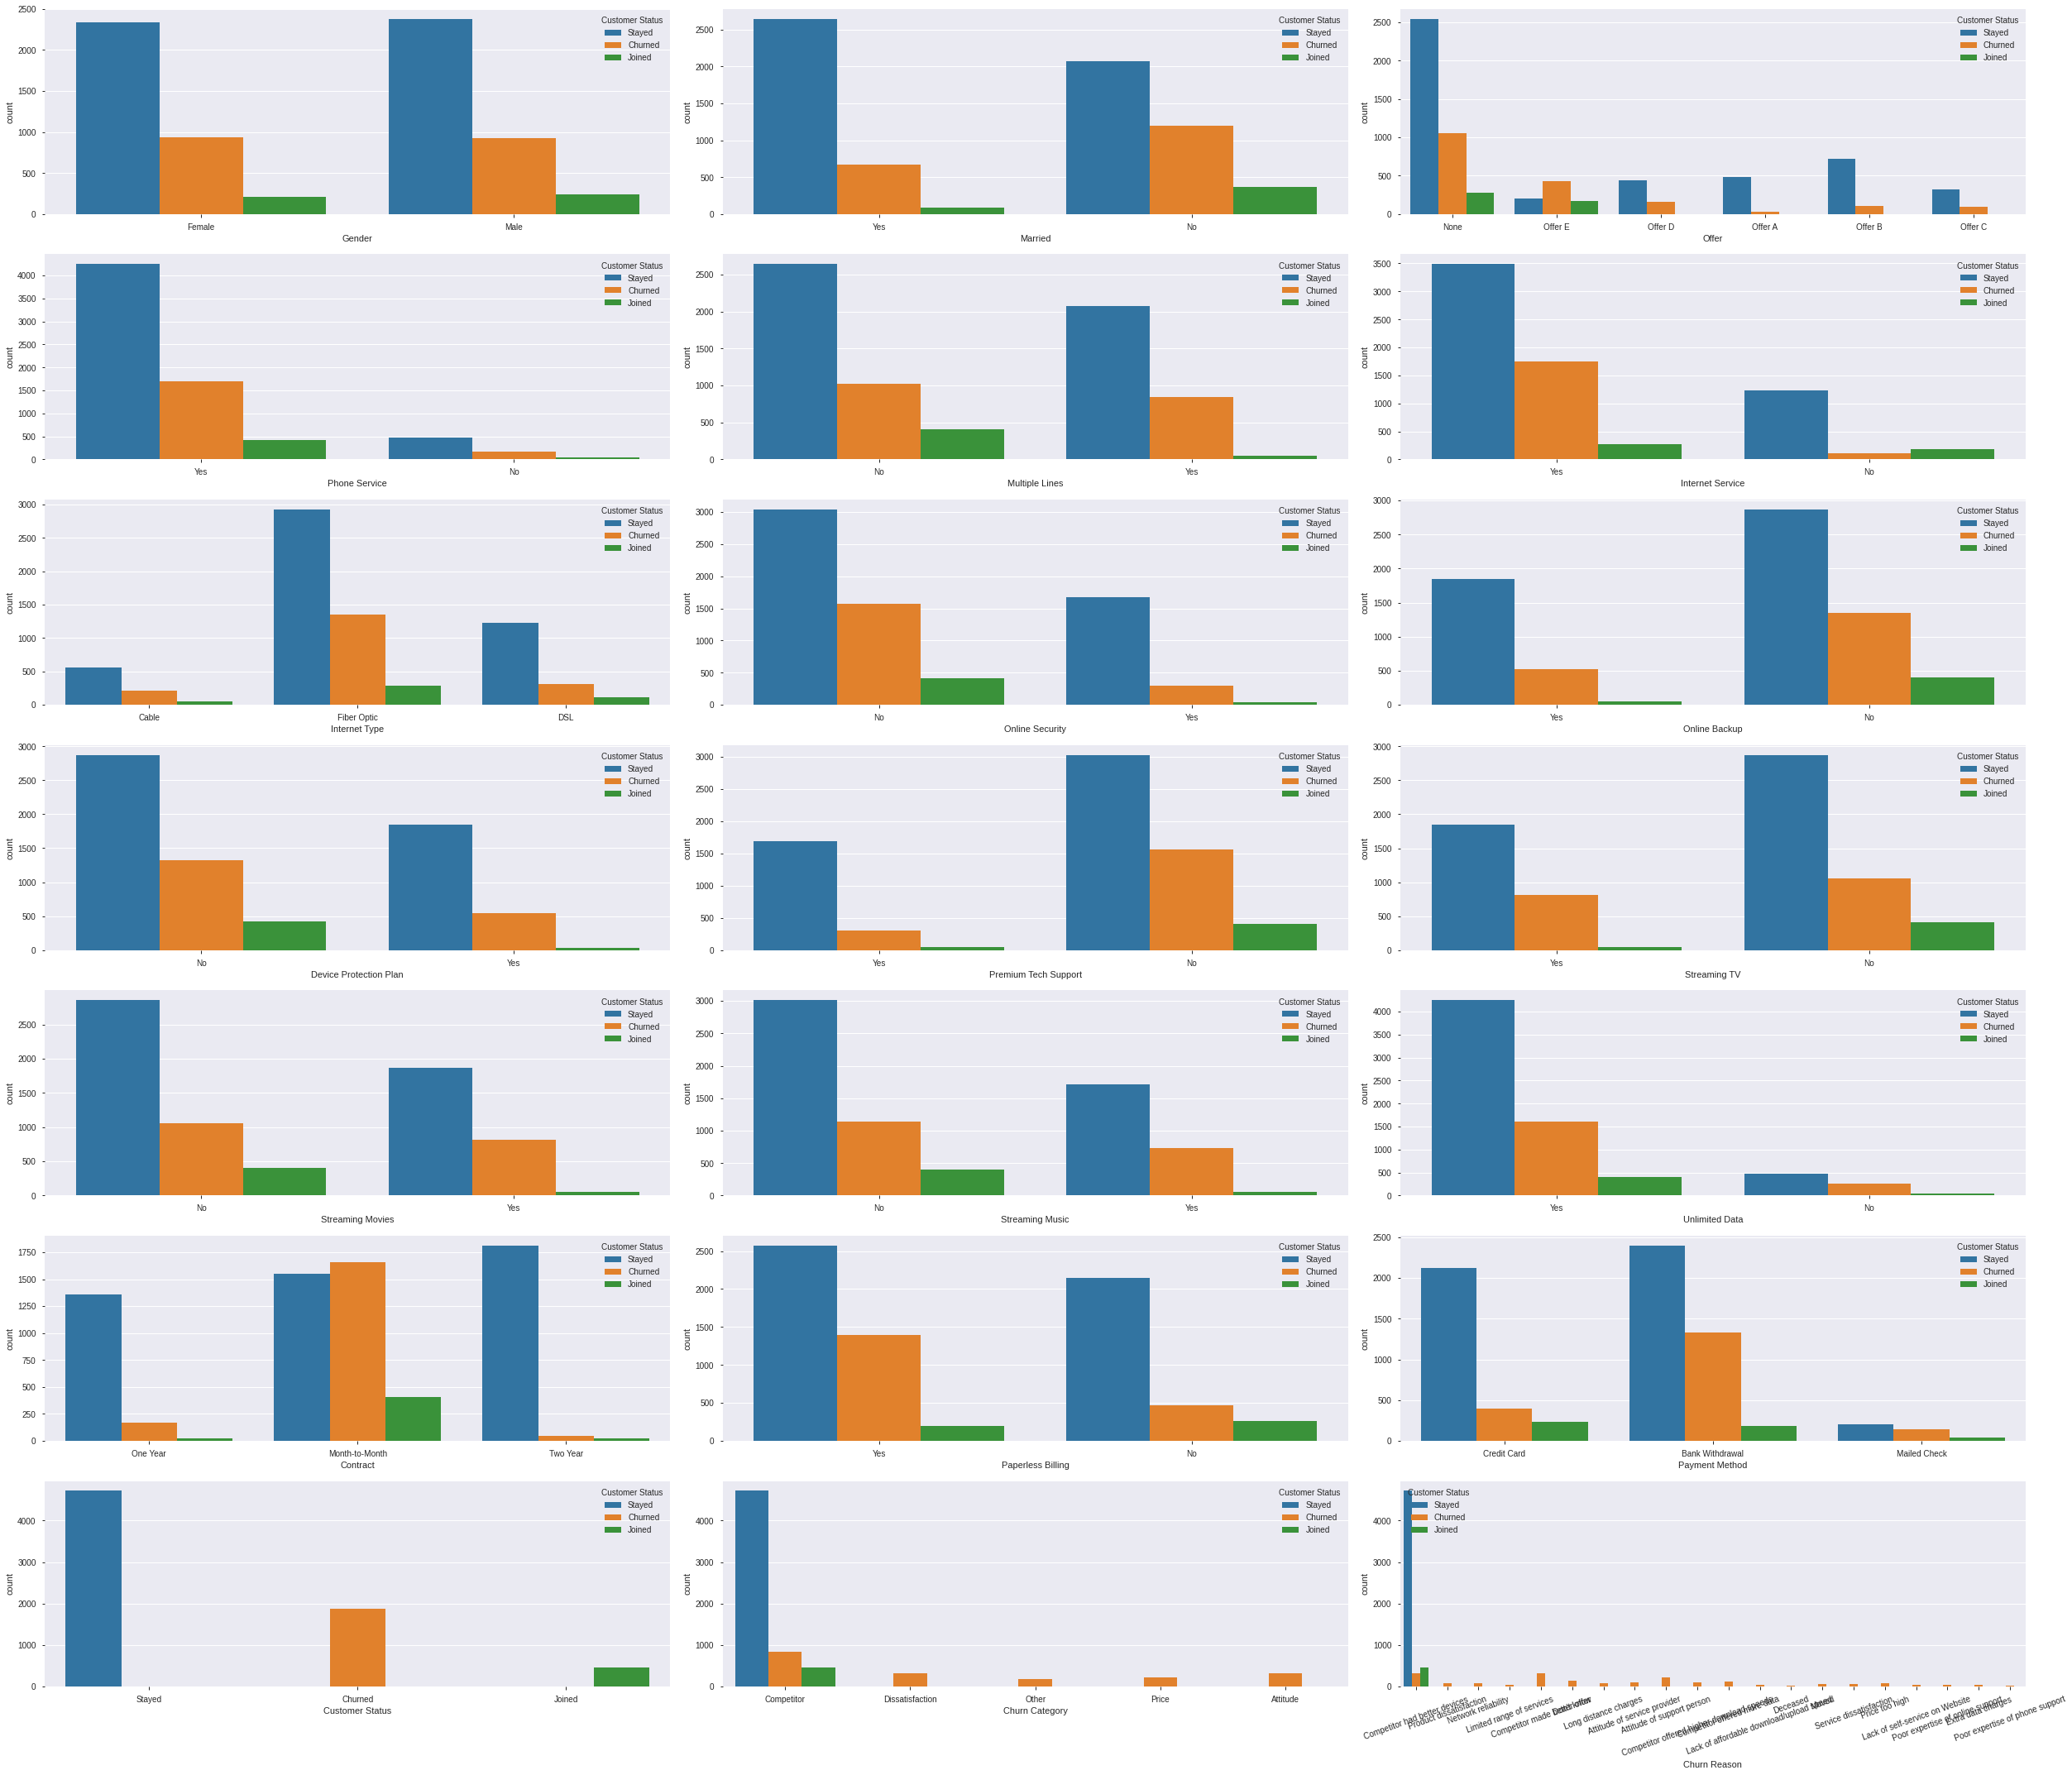

In [ ]:
cat = df.select_dtypes(include = "O")

# visualization to display statements from churn, stay and join from categorical data

plt.figure(figsize=(35,45))
for i, col in enumerate(cat.columns):
    axes = plt.subplot(11,3, i + 1)
    sns.countplot(x=cat[col], hue = df['Customer Status'])
plt.tight_layout()
plt.xticks(rotation = 20, fontsize = 10)
plt.show()

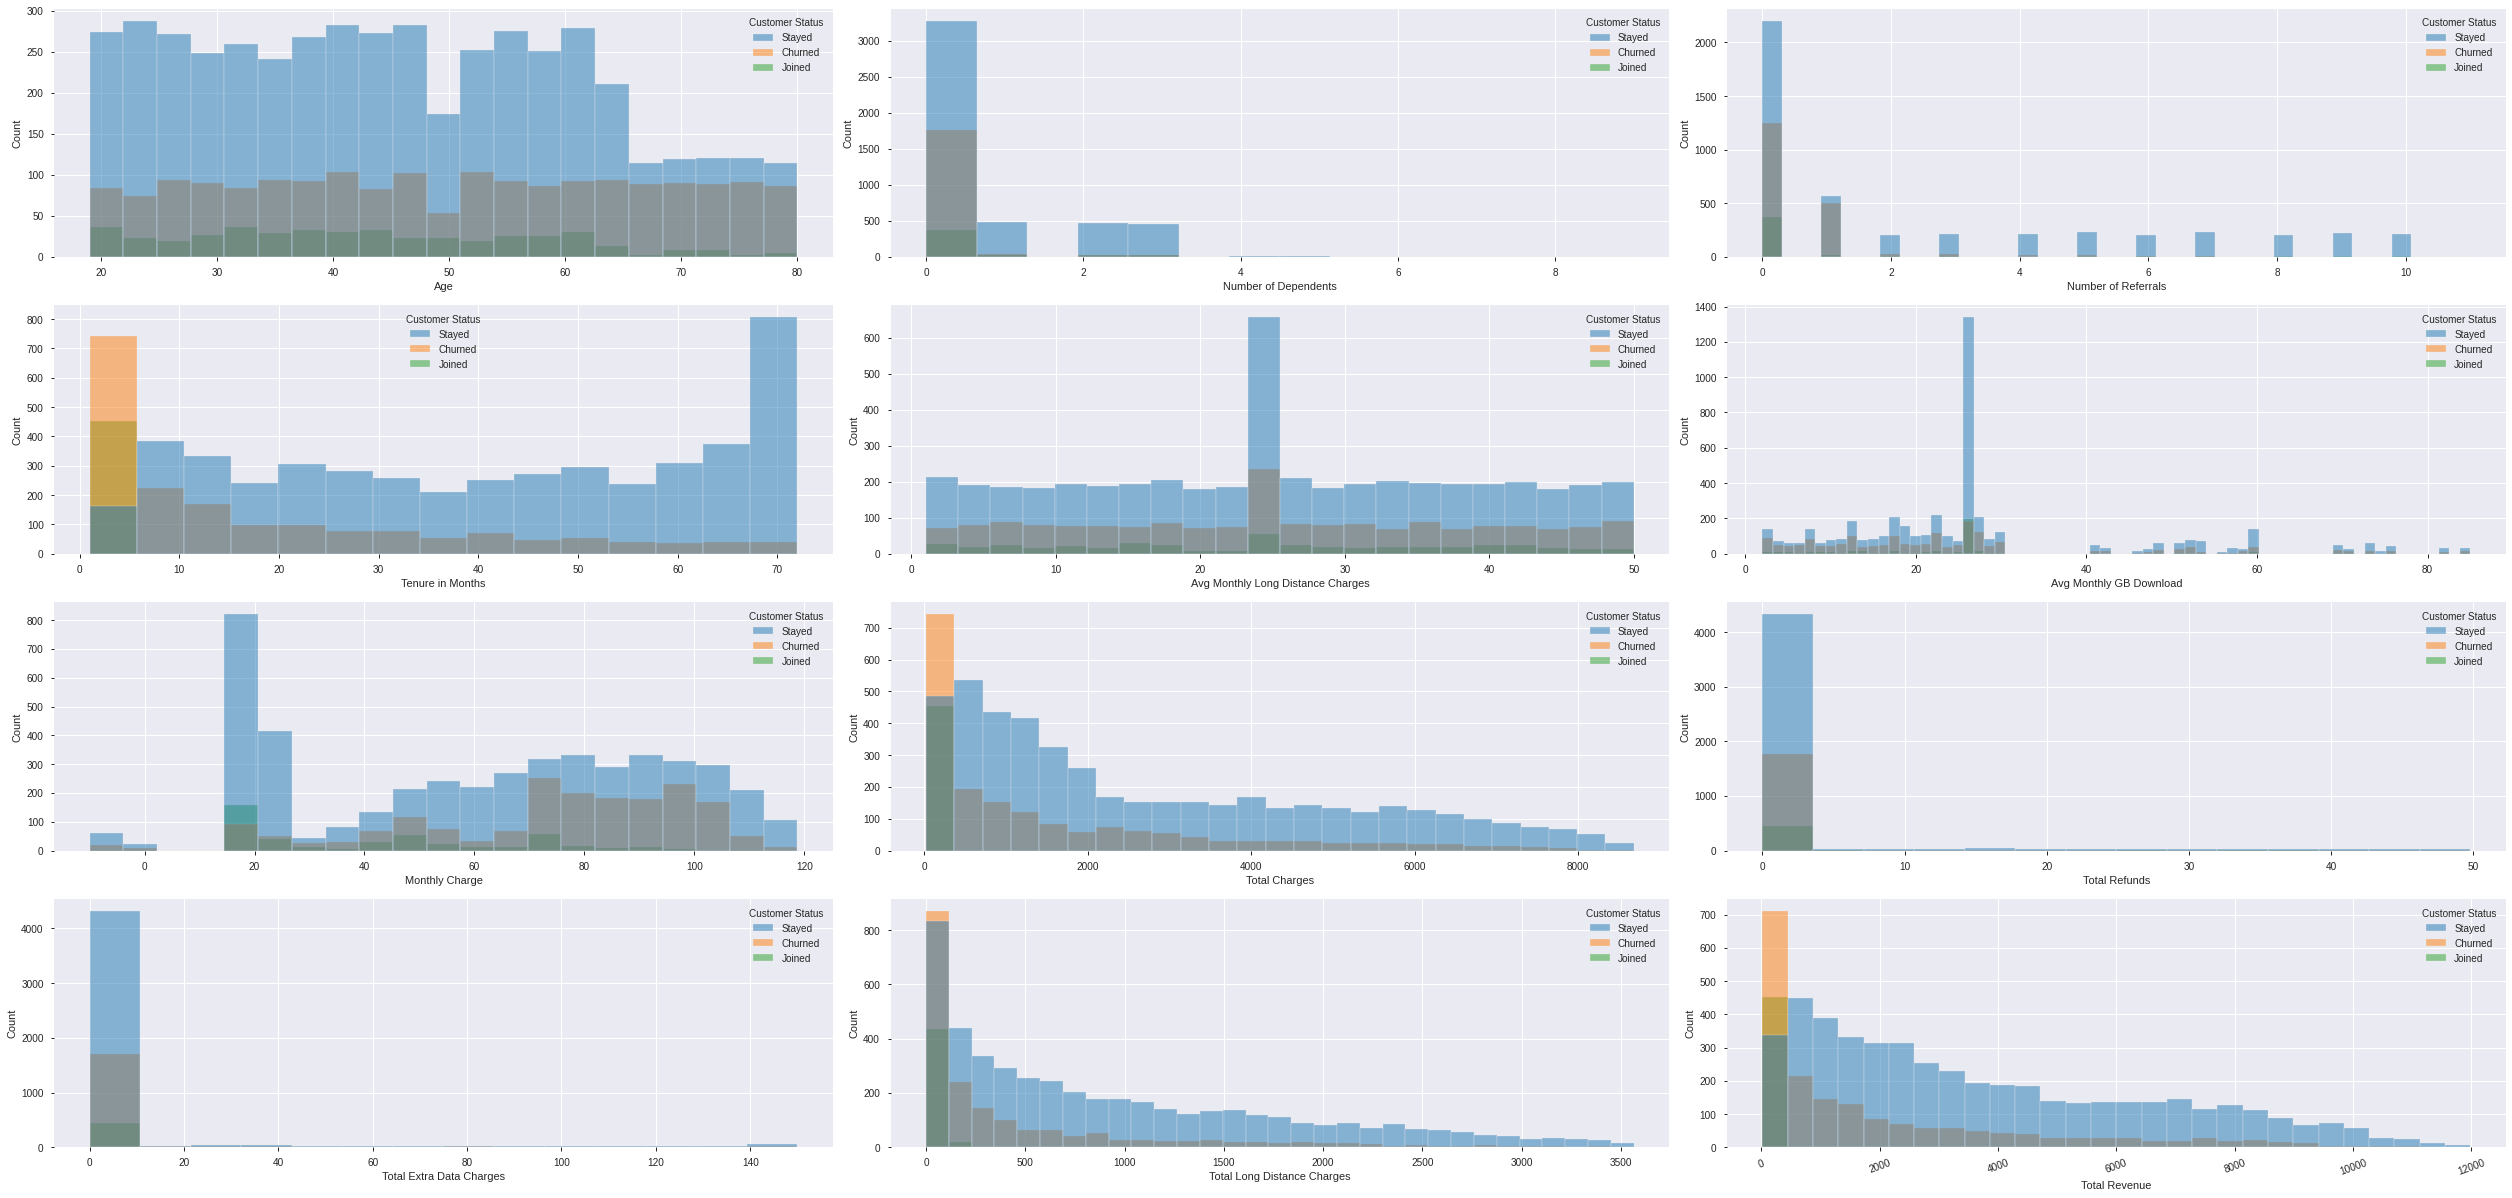

In [ ]:
num = df.select_dtypes(exclude = 'O')

plt.figure(figsize=(35,45))
for i, col in enumerate(num.columns):
    axes = plt.subplot(11,3, i + 1)
    sns.histplot(x=num[col], hue = df['Customer Status'])
plt.tight_layout()
plt.xticks(rotation = 20, fontsize = 10)
plt.show()

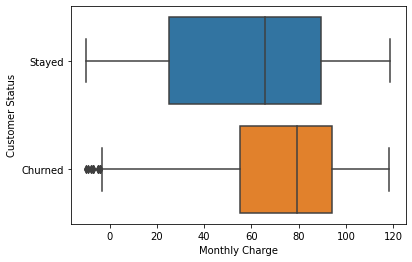

In [ ]:
churned = df_new[df_new['Customer Status'] != 'Joined']
sns.boxplot(x='Monthly Charge', y='Customer Status', data=churned)
plt.show()

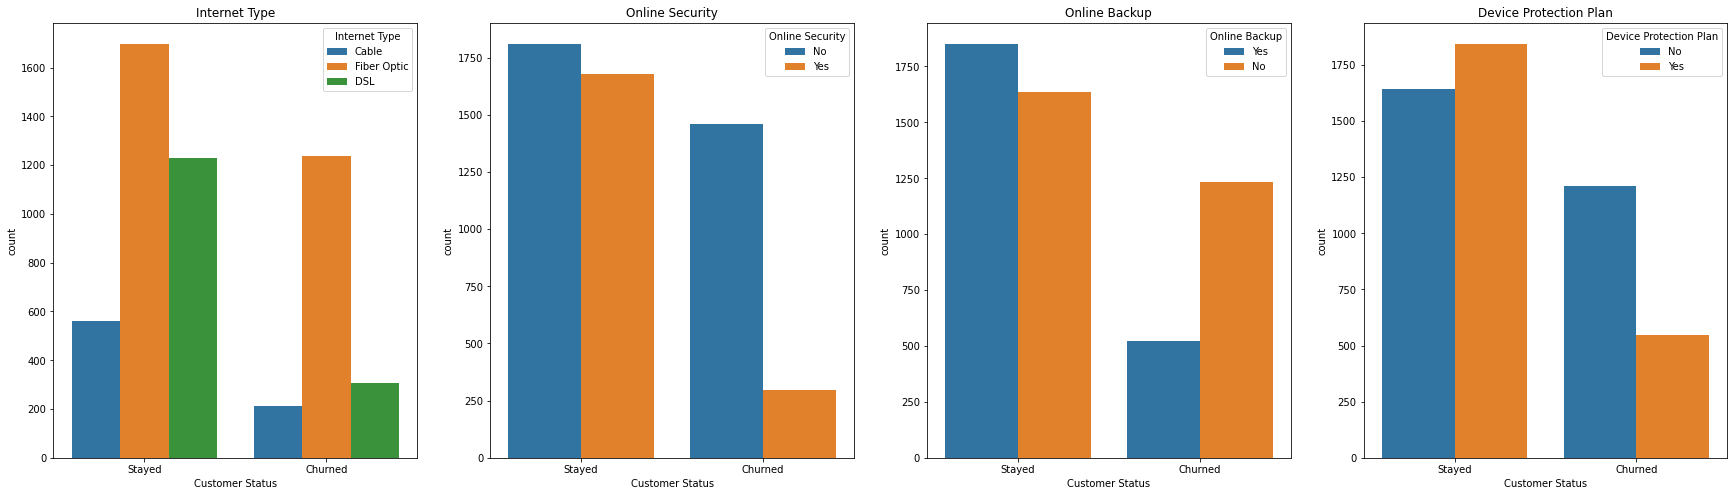

In [ ]:
cat_cols = ['Internet Type','Online Security','Online Backup', 'Device Protection Plan']

plt.figure(figsize=(30,8))

for i, col in enumerate(cat_cols):
    ax = plt.subplot(1, len(cat_cols), i+1)
    sns.countplot(x ="Customer Status", hue = str(col), data = churned)
    ax.set_title(f"{col}")

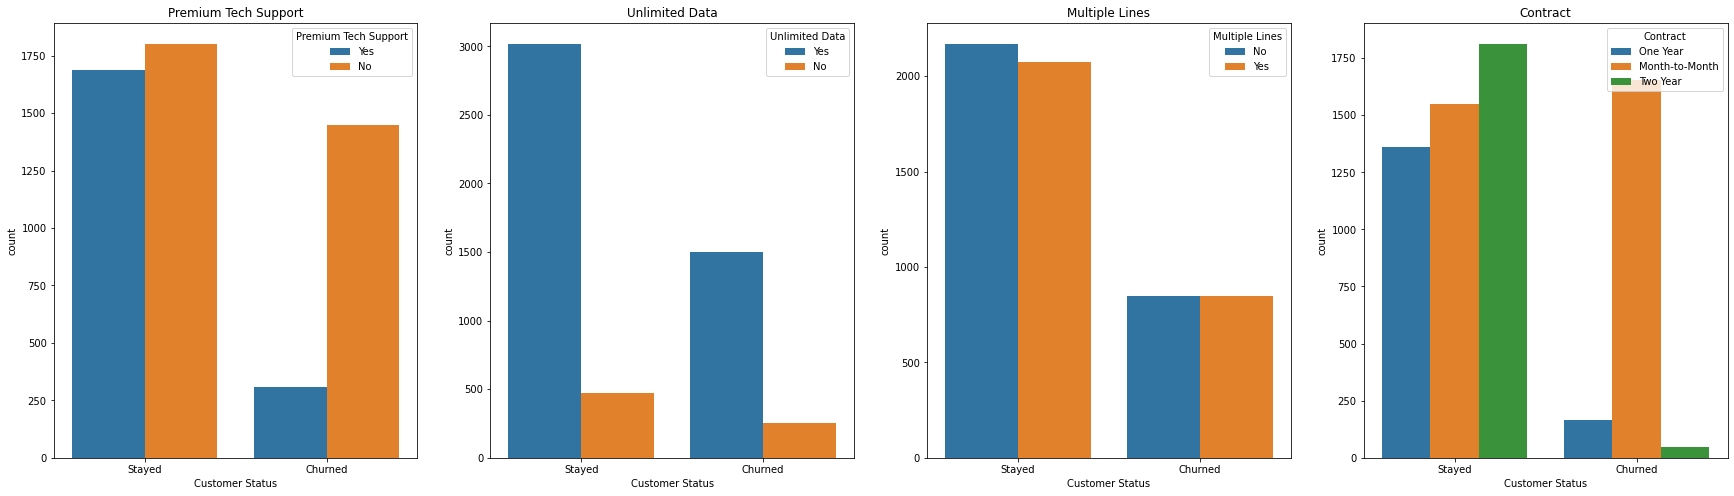

In [ ]:
cat_cols_2 = ['Premium Tech Support','Unlimited Data','Multiple Lines','Contract']

plt.figure(figsize=(30,8))

for i, col2 in enumerate(cat_cols_2):
    ax = plt.subplot(1, len(cat_cols_2), i+1)
    sns.countplot(x ="Customer Status", hue = str(col2), data = churned)
    ax.set_title(f"{col2}")

## 6. Preprocessing

In [ ]:
df["Customer Status"].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

In [ ]:
df = df.loc[df["Customer Status"] != 'Joined']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Customer Status'] = le.fit_transform(df['Customer Status'])

In [ ]:
num_col = list(df.describe().columns)
cat_col = list(set(df.columns).difference(num_col))

<ipython-input-184-8ee25095abb4>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df[num_col].corr(), dtype=np.bool)


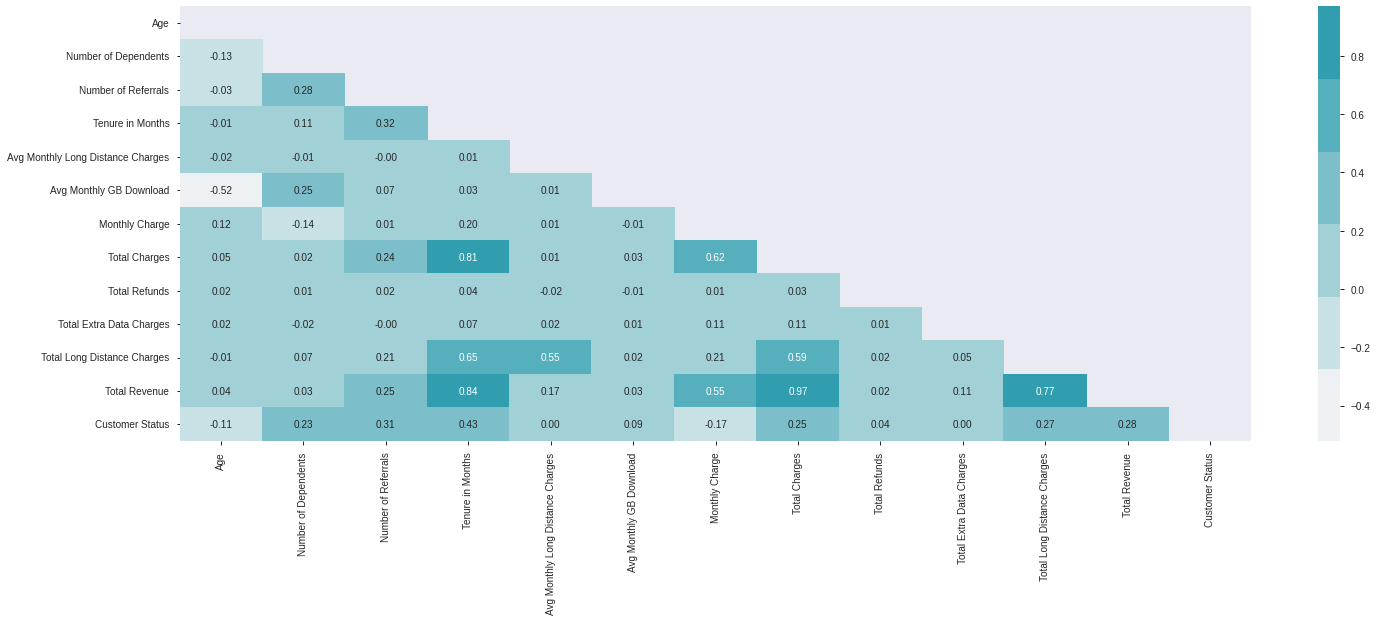

In [ ]:
plt.figure(figsize=(24,8))

# Mask for the upper triangle
mask = np.zeros_like(df[num_col].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(10, 220, as_cmap=True)
cmap = sns.light_palette((210, 90, 60), input="husl")

# Heatmap with mask
sns.heatmap(df[num_col].corr(), mask=mask, cmap=cmap, annot=True, fmt=".2f");


In [ ]:
num_col.remove('Customer Status')

In [ ]:
df_cat = pd.get_dummies(df[cat_col])
df_cat.head()

,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Churn Reason_Attitude of service provider,Churn Reason_Attitude of support person,Churn Reason_Competitor had better devices,Churn Reason_Competitor made better offer,Churn Reason_Competitor offered higher download speeds,Churn Reason_Competitor offered more data,Churn Reason_Deceased,Churn Reason_Don't know,Churn Reason_Extra data charges,Churn Reason_Lack of affordable download/upload speed,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction,Streaming Music_No,Streaming Music_Yes,Paperless Billing_No,Paperless Billing_Yes,Gender_Female,Gender_Male,Phone Service_No,Phone Service_Yes,Married_No,Married_Yes,Streaming TV_No,Streaming TV_Yes,Online Security_No,Online Security_Yes,Online Backup_No,Online Backup_Yes,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Service_No,Internet Service_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Streaming Movies_No,Streaming Movies_Yes,Premium Tech Support_No,Premium Tech Support_Yes,Multiple Lines_No,Multiple Lines_Yes,Churn Category_Attitude,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Other,Churn Category_Price,Unlimited Data_No,Unlimited Data_Yes,Device Protection Plan_No,Device Protection Plan_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0


In [ ]:
X = pd.concat([df[num_col], df_cat], axis=1)
X.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Churn Reason_Attitude of service provider,Churn Reason_Attitude of support person,Churn Reason_Competitor had better devices,Churn Reason_Competitor made better offer,Churn Reason_Competitor offered higher download speeds,Churn Reason_Competitor offered more data,Churn Reason_Deceased,Churn Reason_Don't know,Churn Reason_Extra data charges,Churn Reason_Lack of affordable download/upload speed,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction,Streaming Music_No,Streaming Music_Yes,Paperless Billing_No,Paperless Billing_Yes,Gender_Female,Gender_Male,Phone Service_No,Phone Service_Yes,Married_No,Married_Yes,Streaming TV_No,Streaming TV_Yes,Online Security_No,Online Security_Yes,Online Backup_No,Online Backup_Yes,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Service_No,Internet Service_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Streaming Movies_No,Streaming Movies_Yes,Premium Tech Support_No,Premium Tech Support_Yes,Multiple Lines_No,Multiple Lines_Yes,Churn Category_Attitude,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Other,Churn Category_Price,Unlimited Data_No,Unlimited Data_Yes,Device Protection Plan_No,Device Protection Plan_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,37,0,2,9,42.39,16.0,65.6,593.30,0.00,0,381.51,974.81,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0
1,46,0,0,9,10.69,10.0,-4.0,542.40,38.33,10,96.21,610.28,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0
2,50,0,0,4,33.65,30.0,73.9,280.85,0.00,0,134.60,415.45,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0
3,78,0,1,13,27.82,4.0,98.0,1237.85,0.00,0,361.66,1599.51,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0
4,75,0,3,3,7.38,11.0,83.9,267.40,0.00,0,22.14,289.54,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0


In [ ]:
y = df['Customer Status']
y.value_counts()

1    4720
0    1869
Name: Customer Status, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

--

In [ ]:
le=LabelEncoder()
# converted alll the categorical variables into numerical variables
for i in df.columns:
    df[i] =le.fit_transform(df[i])
    

In [ ]:
for i in df.columns:
  if df[i].isnull().any():
    mean=df[i].mean()
    df[i]=df[i].fillna(mean,inplace=True)


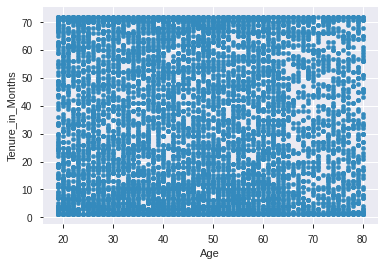

In [ ]:
df.plot.scatter(x='Age',y='Tenure_in_Months')

In [ ]:
pair_plot=sns.pairplot(df)
pair_plot


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9189c59280> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
df.plot.scatter(x='Monthly_Charge',y='Total_Charges')


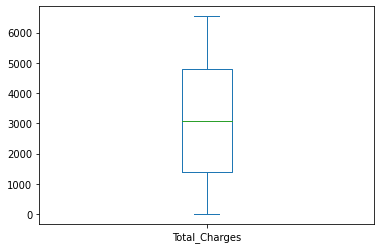

In [ ]:
df.plot.box(x='Monthly_Charge',y='Total_Charges')

In [ ]:
df2 = df.select_dtypes(include=['object'])
df3 = df.select_dtypes(exclude=['object'])

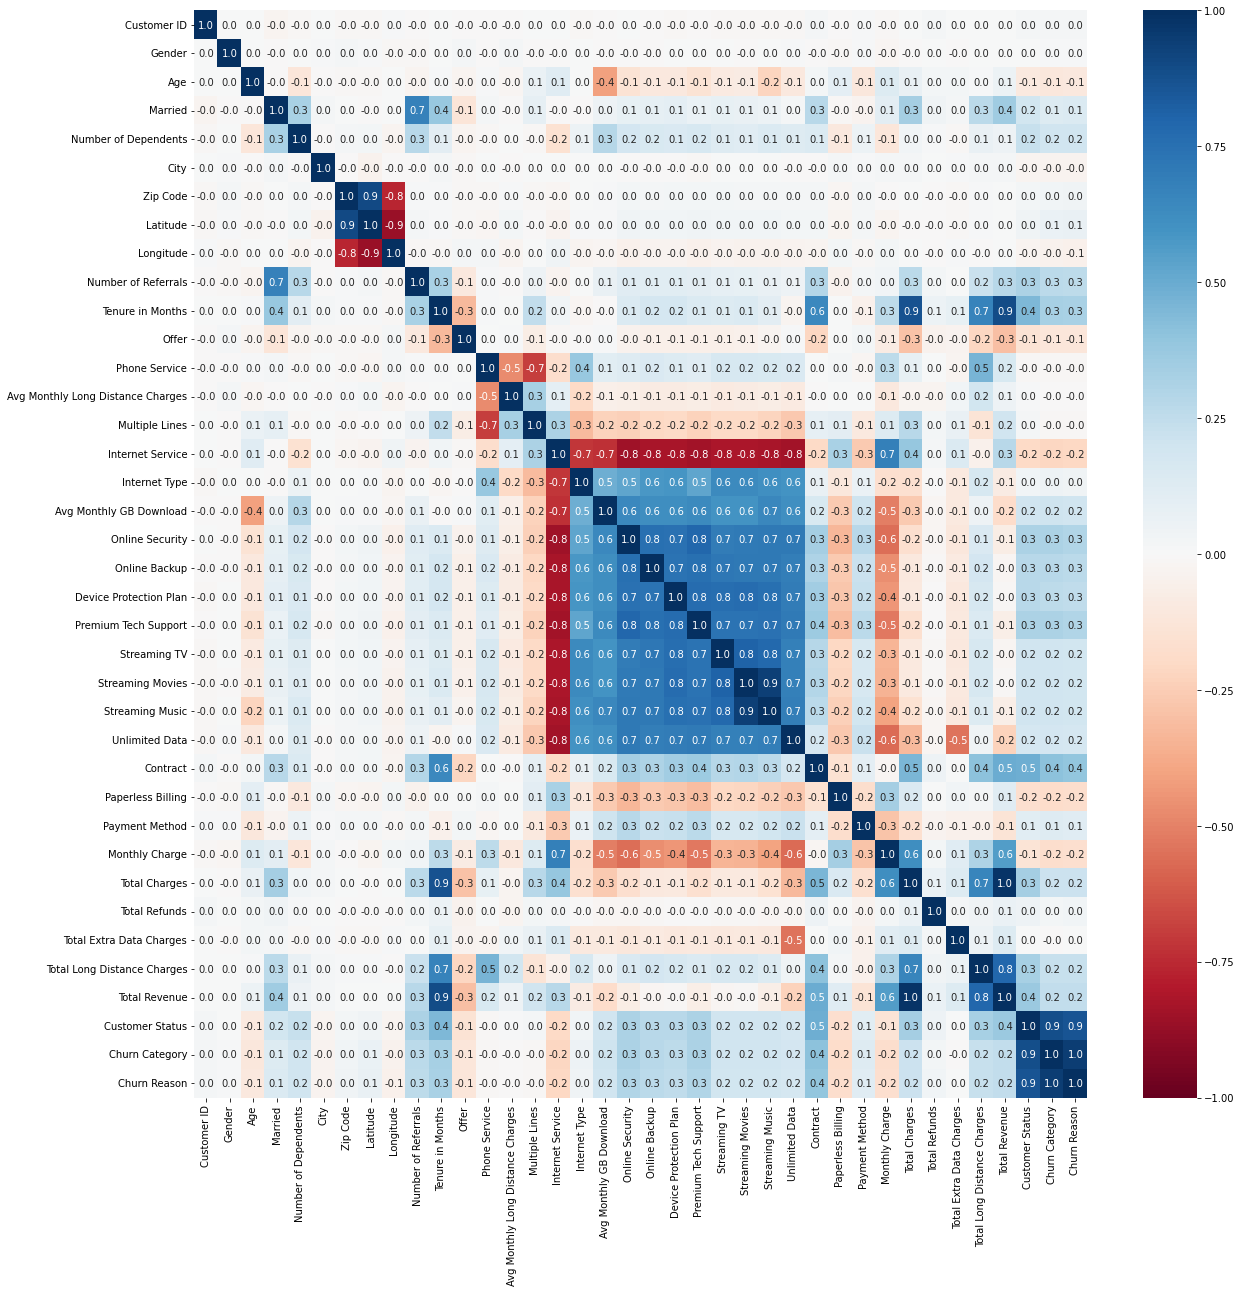

In [ ]:
corr_matrix = df.corr()
fig, axs=plt.subplots(figsize=(20,20))
fig=sns.heatmap(corr_matrix, cmap='RdBu', annot=True,vmax=1,vmin=-1,xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns,fmt='.1f')
#plt.figure(figsize=(30,20))
plt.show()

In [ ]:
variables=[]

In [ ]:
pd.plotting.scatter_matrix(df[], figsize=(10,10))

In [ ]:
df_std=(df-df.mean())/df.std()
df_std


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,-1.731682,-1.009487,-0.567733,1.034457,-0.4868,-0.786370,-0.248263,-0.255479,0.223881,0.016038,...,0.834645,-0.065963,-0.676214,-0.243392,-0.273281,-0.059715,-0.601766,0.677509,0.556709,0.538144
1,-1.731190,0.990462,-0.030431,-0.966554,-0.4868,-0.714895,-1.226208,-0.539258,0.675544,-0.650362,...,0.834645,-1.400201,-0.725040,4.631965,0.125046,-0.794037,-0.864032,0.677509,0.556709,0.538144
2,-1.730698,0.990462,0.208370,-0.966554,-0.4868,-1.189232,-0.488017,-1.292526,0.911928,-0.650362,...,-0.833461,0.232840,-1.031869,-0.243392,-0.273281,-0.652781,-1.031784,-1.599064,-1.866594,-2.142407
3,-1.730207,0.990462,1.879977,1.034457,-0.4868,-0.003388,0.405804,0.789915,-1.143769,-0.317162,...,-0.833461,1.179049,-0.141704,-0.243392,-0.273281,-0.102568,-0.238551,-1.599064,-1.260768,0.240305
4,-1.729715,-1.009487,1.700876,1.034457,-0.4868,-1.458890,-0.336593,-0.451621,0.198554,0.349238,...,0.834645,0.622944,-1.051399,-0.243392,-0.273281,-1.249021,-1.162917,-1.599064,-1.260768,-0.355373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.729715,-1.009487,-1.582637,-0.966554,-0.4868,-0.318530,-0.978041,-1.524140,1.416354,-0.650362,...,0.834645,-0.435316,-0.542073,-0.243392,-0.273281,0.275703,-0.380076,0.677509,0.556709,0.538144
7039,1.730207,0.990462,-0.388632,1.034457,-0.4868,0.776345,0.925271,0.552041,-0.421954,-0.317162,...,-0.833461,0.672744,0.262776,-0.243392,-0.273281,-0.111033,0.050437,-1.599064,-1.260768,0.240305
7040,1.730698,0.990462,-1.463237,-0.966554,-0.4868,-0.948815,0.998880,1.317828,-1.709402,-0.650362,...,0.834645,-0.601318,-1.353603,-0.243392,-0.273281,-1.112526,-1.366298,-0.460777,0.556709,0.538144
7041,1.731190,0.990462,-1.522937,1.034457,-0.4868,1.110980,-0.891813,-1.440676,1.220071,1.015638,...,0.834645,0.006663,1.084071,-0.243392,-0.273281,-0.628444,0.859009,0.677509,0.556709,0.538144


In [ ]:
from sklearn.decomposition import PCA
 

In [ ]:
pca=PCA(n_components=2)
principal_components=pca.fit_transform(df_std)
pd.DataFrame(principal_components)

,0,1
0,-1.305649,-0.021007
1,-2.208308,1.051765
2,-2.869914,3.621169
3,-1.899829,1.045058
4,-2.275865,2.258591
...,...,...
7038,-0.488855,0.937639
7039,-2.339680,0.713435
7040,-1.644841,2.789059
7041,0.278415,-2.186828
